In [ ]:
##please test for editting!

In [4]:
from google.colab import files

uploaded = files.upload()

Saving dataset.txt to dataset.txt


In [5]:
# libraries
import pandas as pd
import numpy as np
# import data
df = pd.read_csv('dataset.txt',
                  names=['ID','Clump_Thickness','Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
                         'Single_Epithelial_Cell_Size', 'Bare Nuclei', 'Bland_Chromatin', 'Normal Nucleoli', 
                         'Mitoses', 'Class'])

In [6]:
# test clean 
# changing the variables for benign/malignant 
# from 2/4 to 0/1 
df.loc[df.Class == 2, "Class"] = 0 
df.loc[df.Class == 4, "Class"] = 1 
# removing ID 
df = df.drop(['ID'], axis = 1) 
df.head() 

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare Nuclei,Bland_Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [7]:
# first check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_Thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [8]:
# By checking the value of Bare Nuclei, we can find it has some missing values, we need to drop it.
df.drop(df[df['Bare Nuclei'] == '?'].index, inplace= True)

In [9]:
df.shape[0] # We drop 699 - 683 = 16 rows

683

In [10]:
# change df['Bare Nuclei'] back to int 64 type
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_Thickness              683 non-null    int64
 1   Uniformity_Cell_Size         683 non-null    int64
 2   Uniformity_Cell_Shape        683 non-null    int64
 3   Marginal_Adhesion            683 non-null    int64
 4   Single_Epithelial_Cell_Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland_Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB


In [12]:
cols = ['Clump_Thickness','Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
                         'Single_Epithelial_Cell_Size', 'Bare Nuclei', 'Bland_Chromatin', 'Normal Nucleoli', 
                         'Mitoses', 'Class']
# finding outliers
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
detector_SVM = OneClassSVM(nu = 0.01)
detector_LOF = LocalOutlierFactor(n_jobs=-1)
detector_IF = IsolationForest(n_jobs=-1)
outlier_SVM = detector_SVM.fit_predict(df)
outlier_LOF = detector_LOF.fit_predict(df)
outlier_IF = detector_IF.fit_predict(df)
print("SVM:")
print(pd.crosstab(outlier_SVM, columns= cols))
print("LOF:")
print(pd.crosstab(outlier_LOF,  columns= cols))
print("IsolationForest:")
print(pd.crosstab(outlier_IF,  columns= cols))

SVM:
col_0             Clump_Thickness
col_1        Uniformity_Cell_Size
col_2       Uniformity_Cell_Shape
col_3           Marginal_Adhesion
col_4 Single_Epithelial_Cell_Size
col_5                 Bare Nuclei
col_6             Bland_Chromatin
col_7             Normal Nucleoli
col_8                     Mitoses
col_9                       Class
row_0                            
-1                             29
 1                            654
LOF:
col_0             Clump_Thickness
col_1        Uniformity_Cell_Size
col_2       Uniformity_Cell_Shape
col_3           Marginal_Adhesion
col_4 Single_Epithelial_Cell_Size
col_5                 Bare Nuclei
col_6             Bland_Chromatin
col_7             Normal Nucleoli
col_8                     Mitoses
col_9                       Class
row_0                            
-1                            170
 1                            513
IsolationForest:
col_0             Clump_Thickness
col_1        Uniformity_Cell_Size
col_2       Uniformit

In [13]:
# We use SVM since the outcome is reasonable
SVM_results = np.where(outlier_SVM == -1)
drop_index = SVM_results[0]
df = df.drop(drop_index)

In [14]:
df.shape[0]

654

In [15]:
# Now we can draw the heat map to analyse the relationship

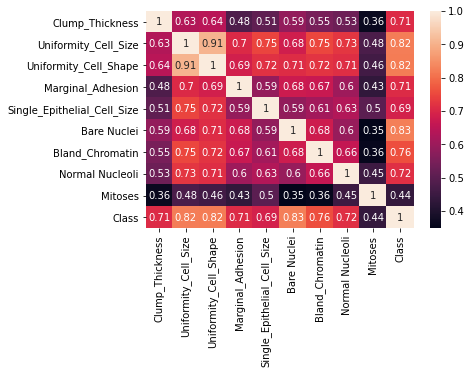

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
heatMap = sns.heatmap(df.corr(),annot=True)

In [17]:
# From the heat map, we can see Unifomity_Cell_Size and Uniformity_Cell_Shape are highly correlated features
# Randomly remove one, choose Uniformity_Cell_Shape

In [18]:
df = df.drop(['Uniformity_Cell_Shape'], axis = 1)

In [19]:
# Normalizing Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
normal_df = pd.DataFrame(scaler.transform(df), columns = ['Clump_Thickness', 'Uniformity_Cell_Size',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare Nuclei',
       'Bland_Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'])
normal_df.head()

,Clump_Thickness,Uniformity_Cell_Size,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare Nuclei,Bland_Chromatin,Normal Nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,0.0
1,0.444444,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,0.0
2,0.222222,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,0.0
3,0.555556,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,0.0
4,0.333333,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,0.0


In [20]:
#performing linear regression
import math
class linearRegression:
    def __init__(self):#stores the b values
        self.b = []
        self.order = 0
    def fit(self,x,y, order):#given the inputs x and y, it calculates the b values
        #calculating b values
        #initial X then to add the other orders based on the order given
        X = np.c_[np.ones(len(x))]
        #givne the order is larger than 0 then it keeps adding columns based on what order to calculate
        if order > 0:        
            for j in range(1,(order+1)):
                X = np.column_stack((X,np.power(x,j)))

        self.b = np.linalg.inv(X.T@X)@(X.T@y)
        self.order = order
        return
    def predict(self,x):#given x it predicts what the value would be
        #calculating prediction
        #starts at order 0 and makes it's way up to the order given
        prediction = []
        for i in range(len(x)):
            pred_0 = self.b[0]
            if self.order > 0:
                for j in range(1,(self.order+1)):
                    pred_0 += self.b[j] * np.power(x[i],j)
            prediction.append(pred_0)
        #returns prediction
        return prediction

    def MSE(self,y,predictions):#it sees how big of an error it had
        mse = 0
        for x in range(len(y)):
            mse += (y[x]-predictions[x])**2
        mse = mse / len(y)
        return mse

#trains all the features from order 0 to 3
def trainData(xTrain,yTrain):
  ListOfLRObjects = []
  for i in range(9):
    ListOfLRObjects.append([])
    for j in range(4):
      ListOfLRObjects[i].append(linearRegression())
      ListOfLRObjects[i][j].fit(xTrain[i],yTrain,j)
  return ListOfLRObjects

def printGraph(trainedSet,xTest,yTest,name):
  plt.scatter(xTest,yTest)
  fx = np.linspace(math.floor(xTest.min()) , math.ceil(xTest.max()) , math.ceil(xTest.max())-math.floor(xTest.min()))
  fy = []
  fy.append(trainedSet[0].b[0] +trainedSet[1].b[1]*fx * 0)
  fy.append(trainedSet[1].b[0]+trainedSet[1].b[1]*fx)
  fy.append(trainedSet[2].b[0]+trainedSet[2].b[1]*fx + trainedSet[2].b[2] *pow(fx,2))
  fy.append(trainedSet[3].b[0]+trainedSet[3].b[1]*fx + trainedSet[3].b[2] *pow(fx,2) + trainedSet[3].b[3] *pow(fx,3))
  for i in range(4):
    plt.plot(fx,fy[i], label ='Order %i'%i)
  plt.xlabel(name)
  plt.ylabel("class")
  plt.legend(loc='best')
  plt.show()
  return


trainingSize = math.floor(len(df.index) * .7)
df70 = df.iloc[:trainingSize,:]
df30 = df.iloc[trainingSize:,:]
xTrain = []
xTest = []
yTest = np.array(df30['Class'])
yTrain = np.array(df70['Class'])

xTrain.append(np.array(df70['Clump_Thickness']))
xTrain.append(np.array(df70['Uniformity_Cell_Size']))
xTrain.append(np.array(df70['Uniformity_Cell_Shape']))
xTrain.append(np.array(df70['Marginal_Adhesion']))
xTrain.append(np.array(df70['Single_Epithelial_Cell_Size']))
xTrain.append(np.array(df70['Bare Nuclei']))
xTrain.append(np.array(df70['Bland_Chromatin']))
xTrain.append(np.array(df70['Normal Nucleoli']))
xTrain.append(np.array(df70['Mitoses']))

xTest.append(np.array(df30['Clump_Thickness']))
xTest.append(np.array(df30['Uniformity_Cell_Size']))
xTest.append(np.array(df30['Uniformity_Cell_Shape']))
xTest.append(np.array(df30['Marginal_Adhesion']))
xTest.append(np.array(df30['Single_Epithelial_Cell_Size']))
xTest.append(np.array(df30['Bare Nuclei']))
xTest.append(np.array(df30['Bland_Chromatin']))
xTest.append(np.array(df30['Normal Nucleoli']))
xTest.append(np.array(df30['Mitoses']))   



trainedSet = trainData(xTrain,yTrain)


for i in range(9):
  for j in range(4):
    print("Order ", j)
    predictions = trainedSet[i][j].predict(xTrain[i])
    print("MSE of Train = ", trainedSet[i][j].MSE(yTrain,predictions))
    predictions = trainedSet[i][j].predict(xTest[i])
    print("MSE of Test = ", trainedSet[i][j].MSE(yTest,predictions))
  printGraph(trainedSet[i],xTest[i],yTest,df.columns[i])
  

KeyError: ignored

In [ ]:
for n in range(4):
    xTrainClump_ThicknessPrediction.append(pMPG[n].MSE(yTrain,xTrainCylindersPrediction[n]))

xTest.append(np.array(df30['Clump_Thickness']))
xTest.append(np.array(df30['Uniformity_Cell_Size']))
xTrain.append(np.array(df30['Uniformity_Cell_Shape']))
xTest.append(np.array(df30['Marginal_Adhesion']))
xTest.append(np.array(df30['Single_Epithelial_Cell_Size']))
xTest.append(np.array(df30['Bare Nuclei']))
xTest.append(np.array(df30['Bland_Chromatin']))
xTest.append(np.array(df30['Normal Nucleoli']))
xTest.append(np.array(df30['Mitoses']))   
for n in range(4):
    xTrainUniformity_Cell_SizePrediction.append(pCylinders[n].MSE(yTrain,xTrainMPGPrediction[n]))
    
for n in range(4):
    xTrainMarginal_AdhesionPrediction.append(pDisplacement[n].MSE(yTrain,xTrainDisplacementPrediction[n]))
    
for n in range(4):
    xTrainSingle_Epithelial_Cell_SizePrediction.append(pHorsepower[n].MSE(yTrain,xTrainHorsepowerPrediction[n]))
    
for n in range(4):
    xTrainBareNucleiPrediction.append(pAcceleration[n].MSE(yTrain,xTrainAccelerationPrediction[n]))
  
for n in range(4):
    xTrainBland_ChromatinPrediction.append(pAcceleration[n].MSE(yTrain,xTrainAccelerationPrediction[n]))
    
for n in range(4):
    xTrainNormalNucleoliPrediction.append(pModel_year[n].MSE(yTrain,xTrainModel_yearPrediction[n]))
    
for n in range(4):
    xTrainMitosesPrediction.append(pOrigin[n].MSE(yTrain,xTrainOriginPrediction[n]))

NameError: ignored

In [ ]:
# normalized data
normal_df.head()

,Clump_Thickness,Uniformity_Cell_Size,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare Nuclei,Bland_Chromatin,Normal Nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,0.0
1,0.444444,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,0.0
2,0.222222,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,0.0
3,0.555556,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,0.0
4,0.333333,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,0.0


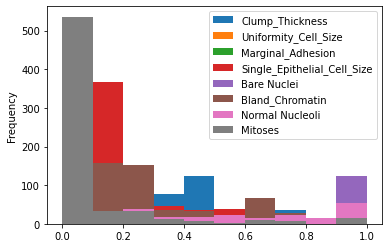

In [ ]:
# shape of data
normal_df.drop('Class', axis = 1).plot.hist()

In [ ]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normal_df.drop('Class', axis = 1), normal_df['Class'], test_size=0.33)
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
print('Training Score:', logReg.score(X_train, y_train))
print('Test Score:', logReg.score(X_test, y_test))

Training Score: 0.9611872146118722
Test Score: 0.9768518518518519


In [ ]:
#ROC AUC score
from sklearn.metrics import roc_auc_score, plot_roc_curve
y_true = logReg.predict(np.array(df.iloc[:, 0:-1]))
y_pred = df['Class']
roc_auc = roc_auc_score(y_true, y_pred, average='macro')
roc_auc

In [ ]:
normal_df.to_csv(r'normalized_data.txt', sep = ',', mode = 'a')

In [ ]:
normal_df.info()
print('Mean of Attributes for Benign:')
print(normal_df.loc[normal_df['Class'] == 0].mean())
print('Mean of Attributes for Malignant:')
print(normal_df.loc[normal_df['Class'] == 1].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              654 non-null    float64
 1   Uniformity_Cell_Size         654 non-null    float64
 2   Marginal_Adhesion            654 non-null    float64
 3   Single_Epithelial_Cell_Size  654 non-null    float64
 4   Bare Nuclei                  654 non-null    float64
 5   Bland_Chromatin              654 non-null    float64
 6   Normal Nucleoli              654 non-null    float64
 7   Mitoses                      654 non-null    float64
 8   Class                        654 non-null    float64
dtypes: float64(9)
memory usage: 46.1 KB
Mean of Attributes for Benign:
Clump_Thickness                0.216808
Uniformity_Cell_Size           0.033256
Marginal_Adhesion              0.038412
Single_Epithelial_Cell_Size    0.123228
Bare Nuclei               

In [ ]:
#ROC AUC
#y_pred = log.predict(np.array(x_train))